In [1]:
%matplotlib inline
%matplotlib widget
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt

from lsst_efd_client import EfdClient

In [2]:
def print_number_filter(data, start, end, num):
    for threshold in np.linspace(start, end, num):
        data_filter = data[ data<threshold ]
        print(f"Number of points less than {threshold} is {len(data_filter)}")

In [3]:
efd_client = EfdClient("summit_efd")

## Time from Russell

Here is a timestamp (TAI unix seconds): 1667946189.507

In [4]:
time = Time(1667946189.507, format='unix_tai', scale='tai')
time.format = 'fits'
print(time)

2022-11-08T22:23:09.507


Based on the above, use the following time period.

In [23]:
time_start = Time("2022-11-08T22:22:30", scale="utc", format="isot")
time_end = Time("2022-11-08T22:24:00", scale="utc", format="isot")

In [24]:
data_rotation = await efd_client.select_time_series(
        "lsst.sal.MTRotator.rotation",
        fields=["timestamp", "private_sndStamp", "private_rcvStamp"],
        start=time_start,
        end=time_end)

In [25]:
timestamps_controller = np.array(data_rotation.timestamp)
diff_timestamps = np.diff(timestamps_controller)

sndStamp_sal = np.array(data_rotation.private_sndStamp)
diff_sndStamp_sal = np.diff(sndStamp_sal)

rcvStamp_sal = np.array(data_rotation.private_rcvStamp)
diff_rcvStamp_sal = np.diff(rcvStamp_sal)

In [26]:
# Check the difference of time
print("Timestamp difference is")
print(diff_timestamps)

print(f"Number of points is {len(diff_timestamps)}")

# Check the limit values
print(f"Max is {np.max(diff_timestamps)}")
print(f"Min is {np.min(diff_timestamps)}")

Timestamp difference is
[0.04999661 0.04999804 0.04999828 ... 0.04999781 0.04999828 0.04999781]
Number of points is 1466
Max is 1.4999420642852783
Min is 0.04999661445617676


In [27]:
print("SAL Sending timestamp difference is")
print(diff_sndStamp_sal)

print(f"Number of points is {len(diff_sndStamp_sal)}")

print(f"Max is {np.max(diff_sndStamp_sal)}")
print(f"Min is {np.min(diff_sndStamp_sal)}")

SAL Sending timestamp difference is
[0.09965491 0.05001521 0.05000472 ... 0.05002975 0.05003715 0.04997921]
Number of points is 1466
Max is 1.500366449356079
Min is 0.04954123497009277


In [28]:
print("SAL Receiving timestamp difference is")
print(diff_rcvStamp_sal)

print(f"Number of points is {len(diff_rcvStamp_sal)}")

print(f"Max is {np.max(diff_rcvStamp_sal)}")
print(f"Min is {np.min(diff_rcvStamp_sal)}")

SAL Receiving timestamp difference is
[0.09966826 0.05001783 0.04999232 ... 0.04999542 0.05008388 0.0499301 ]
Number of points is 1466
Max is 1.5004141330718994
Min is 0.043715715408325195


In [29]:
# Check the threshold
print_number_filter(diff_timestamps, 0.08, 0.6, 10)

# Filter out the weird values
diff_timestamps_filter = diff_timestamps[(diff_timestamps<0.1)]

print(f"Number of points is {len(diff_timestamps_filter)}")

# Check the limit values again
print(f"Max is {np.max(diff_timestamps_filter)}")
print(f"Min is {np.min(diff_timestamps_filter)}")

Number of points less than 0.08 is 1450
Number of points less than 0.13777777777777778 is 1450
Number of points less than 0.19555555555555557 is 1450
Number of points less than 0.25333333333333335 is 1451
Number of points less than 0.3111111111111111 is 1451
Number of points less than 0.36888888888888893 is 1451
Number of points less than 0.4266666666666667 is 1451
Number of points less than 0.4844444444444445 is 1451
Number of points less than 0.5422222222222223 is 1452
Number of points less than 0.6 is 1452
Number of points is 1450
Max is 0.04999852180480957
Min is 0.04999661445617676


In [30]:
print_number_filter(diff_sndStamp_sal, 0.08, 0.6, 10)

diff_sndStamp_sal_filter = diff_sndStamp_sal[(diff_sndStamp_sal<0.09)]

print(f"Number of points is {len(diff_sndStamp_sal_filter)}")

print(f"Max is {np.max(diff_sndStamp_sal_filter)}")
print(f"Min is {np.min(diff_sndStamp_sal_filter)}")

Number of points less than 0.08 is 1449
Number of points less than 0.13777777777777778 is 1450
Number of points less than 0.19555555555555557 is 1450
Number of points less than 0.25333333333333335 is 1451
Number of points less than 0.3111111111111111 is 1451
Number of points less than 0.36888888888888893 is 1451
Number of points less than 0.4266666666666667 is 1451
Number of points less than 0.4844444444444445 is 1451
Number of points less than 0.5422222222222223 is 1452
Number of points less than 0.6 is 1452
Number of points is 1449
Max is 0.05048847198486328
Min is 0.04954123497009277


In [31]:
print_number_filter(diff_rcvStamp_sal, 0.08, 0.6, 10)

diff_rcvStamp_sal_filter = diff_rcvStamp_sal[(diff_rcvStamp_sal<0.09)]

print(f"Number of points is {len(diff_rcvStamp_sal)}")

print(f"Max is {np.max(diff_rcvStamp_sal_filter)}")
print(f"Min is {np.min(diff_rcvStamp_sal_filter)}")

Number of points less than 0.08 is 1449
Number of points less than 0.13777777777777778 is 1450
Number of points less than 0.19555555555555557 is 1450
Number of points less than 0.25333333333333335 is 1451
Number of points less than 0.3111111111111111 is 1451
Number of points less than 0.36888888888888893 is 1451
Number of points less than 0.4266666666666667 is 1451
Number of points less than 0.4844444444444445 is 1451
Number of points less than 0.5422222222222223 is 1452
Number of points less than 0.6 is 1452
Number of points is 1466
Max is 0.05635404586791992
Min is 0.043715715408325195


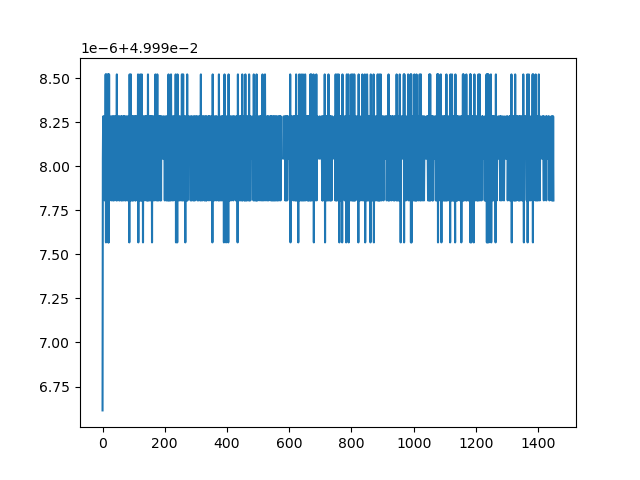

In [32]:
# Check the trend to see I can see the increasement or not
plt.figure()
plt.plot(diff_timestamps_filter)
plt.show()

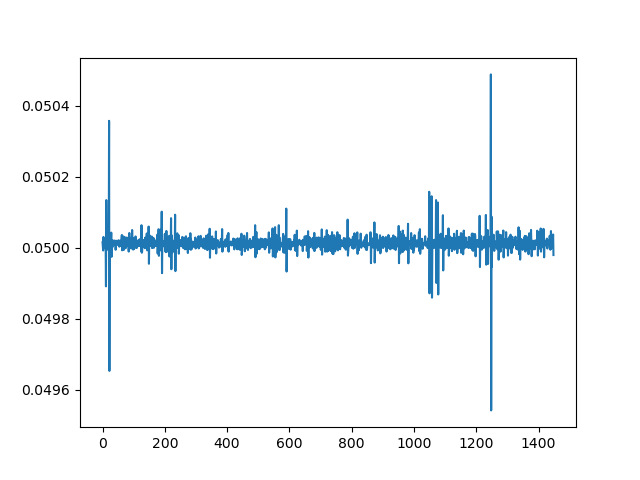

In [33]:
plt.figure()
plt.plot(diff_sndStamp_sal_filter)
plt.show()

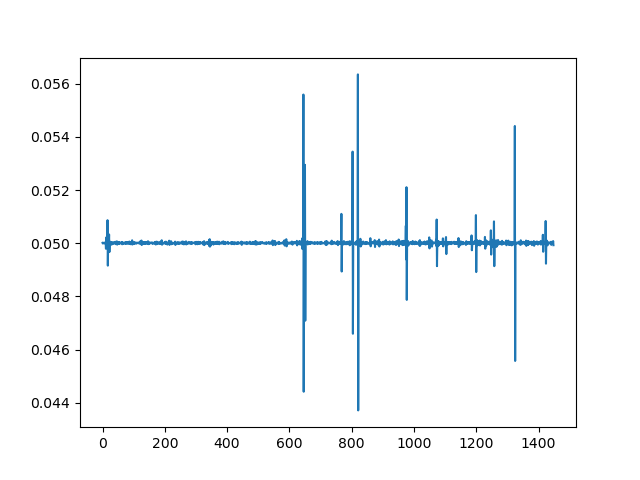

In [34]:
plt.figure()
plt.plot(diff_rcvStamp_sal_filter)
plt.show()

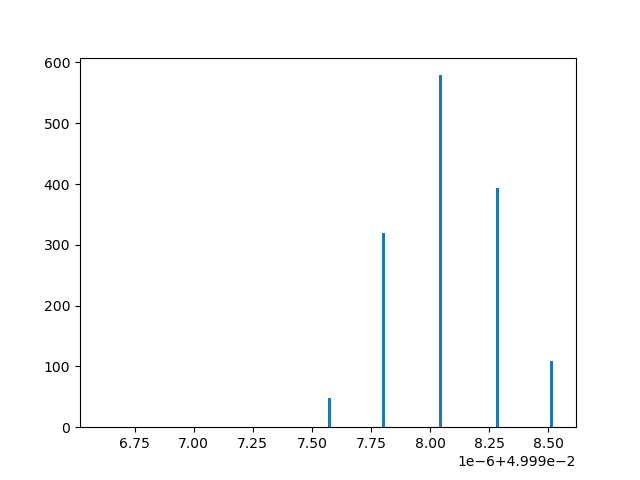

In [41]:
# The histogram of the data
plt.figure()
n, bins, patches = plt.hist(diff_timestamps_filter, bins=150)
plt.show()

In [42]:
std_timestamps = np.std(diff_timestamps_filter)
print(f"STD of timestamps is {std_timestamps} sec.")

print(f"The ratio to the expectation is {std_timestamps/0.05 * 100} %.")

STD of timestamps is 2.3020717289395945e-07 sec.
The ratio to the expectation is 0.0004604143457879189 %.


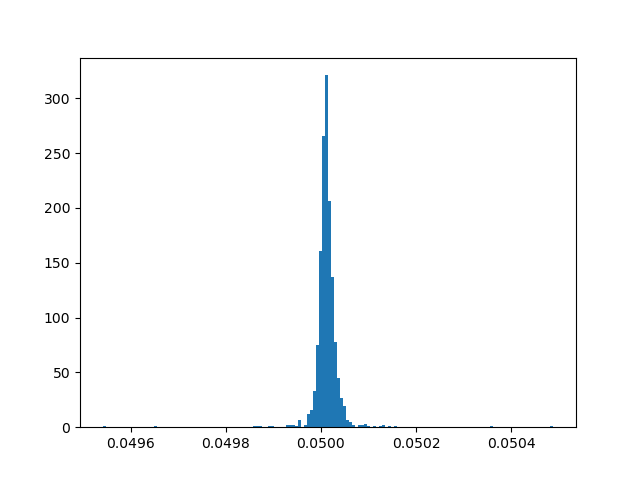

In [43]:
plt.figure()
n, bins, patches = plt.hist(diff_sndStamp_sal_filter, bins=150)
plt.show()

In [44]:
std_sndStamp = np.std(diff_sndStamp_sal_filter)
print(f"STD of SAL sending timestamps is {std_sndStamp} sec.")

print(f"The ratio to the expectation is {std_sndStamp/0.05 * 100} %.")

STD of SAL sending timestamps is 2.971991857577893e-05 sec.
The ratio to the expectation is 0.05943983715155785 %.


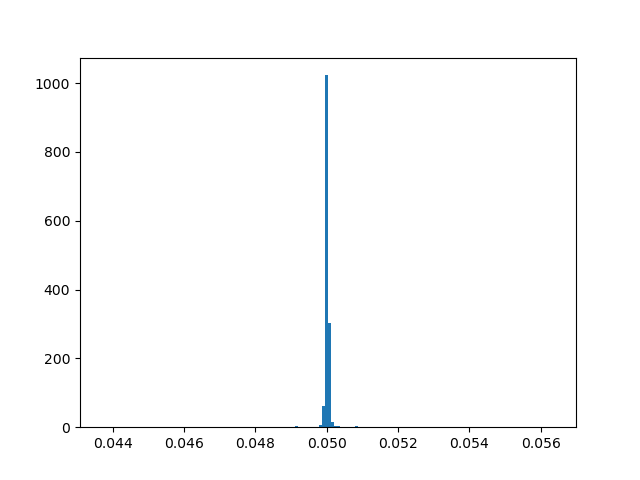

In [45]:
plt.figure()
n, bins, patches = plt.hist(diff_rcvStamp_sal_filter, bins=150)
plt.show()

In [46]:
std_rcvStamp = np.std(diff_rcvStamp_sal_filter)
print(f"STD of SAL receiving timestamps is {std_rcvStamp} sec.")

print(f"The ratio to the expectation is {std_rcvStamp/0.05 * 100} %.")

STD of SAL receiving timestamps is 0.00041191658586938617 sec.
The ratio to the expectation is 0.8238331717387724 %.


In [67]:
plt.close('all')